In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

* make_gaussian_quantiles: es una función de la biblioteca Scikit-learn de Python que se utiliza para crear un conjunto de datos sintéticos de dos clases, donde cada clase sigue una distribución gaussiana multivariable.

* mean=None: este parámetro se utiliza para especificar las medias de las distribuciones gaussianas de las dos clases. Al dejarlo en None, la función asume una media de cero para ambas clases.

* cov=0.1: este parámetro se utiliza para especificar la matriz de covarianza de las distribuciones gaussianas. En este caso, se ha especificado una matriz de covarianza de 0.1 para ambas clases.

* n_samples=N: este parámetro se utiliza para especificar el número total de muestras en el conjunto de datos sintéticos. El valor de N se define previamente en el código.

* n_features=2: este parámetro se utiliza para especificar el número de características (o dimensiones) de cada muestra. En este caso, se ha especificado un valor de 2 para que cada muestra tenga dos características.

* n_classes=2: este parámetro se utiliza para especificar el número de clases en el conjunto de datos. En este caso, se ha especificado un valor de 2 para que el conjunto de datos tenga dos clases.

* shuffle=True: este parámetro se utiliza para especificar si las muestras en el conjunto de datos sintéticos deben ser aleatorizadas o no. Al establecerlo en True, la función aleatoriza las muestras.

* random_state=None: este parámetro se utiliza para especificar la semilla aleatoria utilizada para generar los datos sintéticos. Al establecerlo en None, la función utiliza una semilla aleatoria diferente cada vez.

X, Y = gaussian_quantiles: esta línea de código asigna las características generadas en X y las etiquetas de clase generadas en Y al conjunto de datos sintéticos. Las características en X tienen forma de matriz y las etiquetas en Y tienen forma de vector.

In [2]:
N = 1000
gaussian_quantiles=make_gaussian_quantiles(mean=None, cov=0.1,n_samples=N, n_features=2,n_classes=2,shuffle=True, random_state=None)

X, Y = gaussian_quantiles

In [3]:
Y = Y[:, np.newaxis]

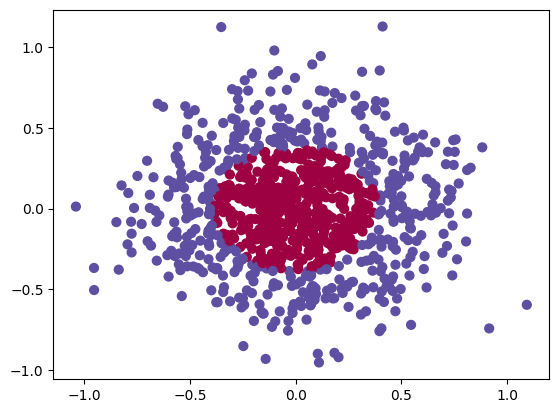

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

Creación de funciones de activación

In [5]:
def sigmoid(x,derivate=False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return 1/(1+np.exp(-x))
    
def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return X
    else:
        return np.maximum(0,x)

Creación de función de pérdida

In [6]:
def mse(y,y_hat, derivate=False):
    if derivate:
        return (y_hat-y)
    else:
        return np.mean((y_hat-y)**2)

Arquitectura de la red neurona
* Hay que crear los pesos y "bias". ---> se crea una lista que describv e la estructura de las capas ocultas y de salida. 

In [7]:
def initialize_parameters_deep(layers_dim): # Lista que llega en una función (recibe la dimensión de las capas ocultas)
    parameters = {} # Se crea un diccionario vacío
    L = len(layers_dim) # Se toma la longitud del arreglo que va a llegar. 
    for l in range(0, L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
        parameters['b'+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
    return parameters

In [8]:
#np.random.rand(10,3) # Aleatoriamente se extraen los pesos (necesarios para crear la capa)

In [9]:
layers_dims = [2,4,8,1]
params = initialize_parameters_deep(layers_dims)

Params tiene los pesos en la capaa uno, dos y tres. 
* W1: son 4 pesos por 2 ejemplos
* W2: son 8 pesos por 4 ejemplos (recibe los pesos de la capa anterior)

In [10]:
#params

In [11]:
#params['W1'].shape

In [12]:
#X.shape

In [13]:
np.matmul(X,params['W1'])

array([[ 0.17294072, -0.20608121,  0.26365736, -0.21046344],
       [-0.45482094,  0.36679335, -0.58010934,  0.35151789],
       [-0.34150773,  0.03724499, -0.28156317, -0.01066035],
       ...,
       [ 0.16492989,  0.01668421,  0.11355827,  0.0451241 ],
       [-0.13702069,  0.34131333, -0.3240285 ,  0.37202193],
       [-0.3133154 ,  0.18822727, -0.35794596,  0.16784487]])

In [14]:
params['b1'].shape

(2, 4)

Creación de la función de entrenamiento neuronal. 
* Realiza procesamiento hacia adelante. 
* Haciendo Backpropagation
* Gradient decent para actualizar los pesos. 

In [15]:
def train(x_data,lr, params, training=True):
    ## Forward
    params['A0'] = X

    params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A0'], params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training: 
        
        ##Backpropagation

        params['dZ3'] = mse(Y, output,True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
        params['dW1'] = np.matmul(params['A1'].T, params['dZ2'])

        ##Gradient decent

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] -(np.mean(params['dW3'], axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * 0.0001
        params['b2'] = params['b2'] -(np.mean(params['dW2'], axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] - params['dW1'] * 0.0001
        params['b1'] = params['b1'] -(np.mean(params['dW1'], axis=0, keepdims=True)) * lr

    return output

Se crea un proceso que itera la función de entrenamiento 30.000 veces con un learning rate. 

In [ ]:
layer_dims = [2,4,8,1] #Arquitectura de la red
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(30000):
    output = train(X,0.001,params)
    if _ % 50 == 0:
        print(mse(Y, output))
        errors.append(mse(Y,output))

In [ ]:
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test, 0.0001, params, training=False)

In [ ]:
y = np.where(y >= 0.5,1,0)

In [ ]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)

In [ ]:
x = np.array(42) 

In [ ]:
x.ndim

0